In [2]:
import pandas as pd
import numpy as np
distances_df = pd.read_csv('data/distanceslonglat.csv')

In [19]:
city_distances_dict = dict(zip(distances_df['Start'] + distances_df['Target'], distances_df['Distance']))
print('\n'.join([f'[{t[0]}]: {t[1]}' for t in list(city_distances_dict.items())[:5]]))

[Aberdeen, ScotlandAberdeen, Scotland]: 0.0
[Aberdeen, ScotlandAdelaide, Australia]: 16183.67640379468
[Aberdeen, ScotlandAlgiers, Algeria]: 2290.736724086423
[Aberdeen, ScotlandAmsterdam, Netherlands]: 698.2432871581038
[Aberdeen, ScotlandAnkara, Turkey]: 3164.73685749606


In [22]:
def all_cities_visited_simulation(cities, cities_dict):
    total_distance = 0
    start = None
    target = None
    
    for city in cities:
        if not (start):
            start = city
            continue
     
        target = city
        total_distance += cities_dict[start + target]
        start = target
        target = None
    return total_distance

In [27]:
cities = distances_df['Start'].unique()
num_simulations = 10000
distances = []
for _ in range(num_simulations):
    np.random.shuffle(cities)
    distance = all_cities_visited_simulation(cities, city_distances_dict)
    distances.append(distance)

print(f'{distances[:5]}...')

[1005866.6174718123, 941559.3179908042, 985806.9054746265, 1000955.237082609, 981251.5786840004]...


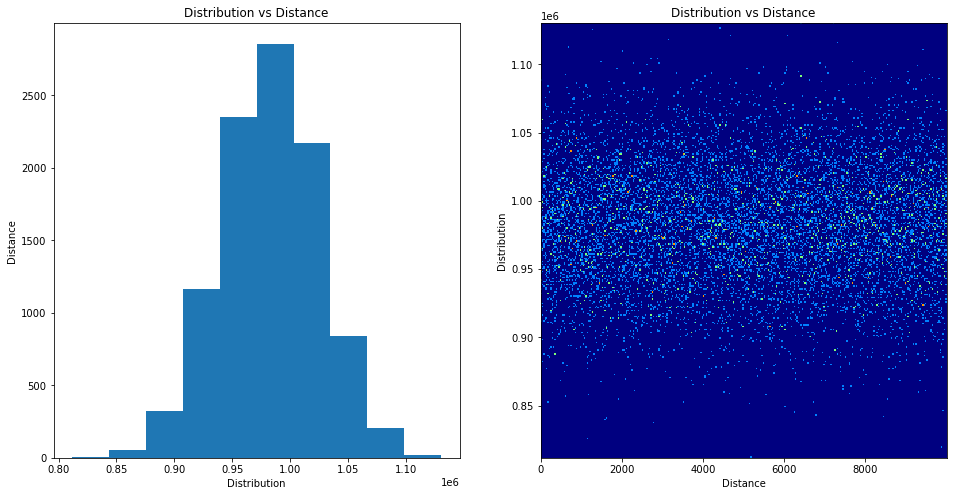

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(distances)

plt.xlabel('Distribution')
plt.ylabel('Distance')
plt.title("Distribution vs Distance")

plt.subplot(1, 2, 2)
plt.hist2d([i for i in range(10000)], distances, bins=(300, 300), cmap=plt.cm.jet)
plt.xlabel('Distance')
plt.ylabel('Distribution')
plt.title("Distribution vs Distance")

plt.show()